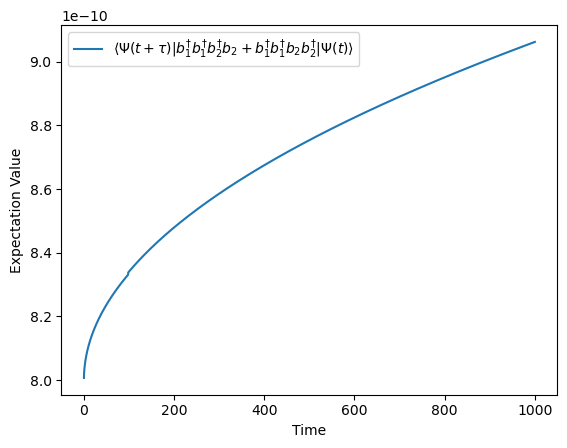

In [7]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

N = 10  
b1 = tensor(destroy(N), qeye(N))  
b2 = tensor(qeye(N), destroy(N))  
omega = 1.0
g_0 = 0.1

# 定义系统的哈密顿量 H 和观测量 Q
H0 = omega * (b1.dag() * b1 + b2.dag() * b2 + 1)
H1 = g_0/(omega**2) * ((b1.dag() + b1)**2) * ((b2.dag() + b2)**2)
H = H0 + H1  # 哈密顿量
Q1 = b1.dag() * b1.dag() * b2.dag() * b2
Q2 = b1.dag() * b1.dag() * b2 * b2.dag() 
Q3 = b1.dag() * b1 * b2.dag() * b2.dag() 
Q4 = b1 * b1.dag() * b2.dag() * b2.dag()

psi0 = tensor(basis(N, 0), basis(N, 0))  # 两个谐振子的基态

# 定义时间范围和时间间隔
t_list1 = np.linspace(0, 1000, 10**4) # 时间范围
tau1 = 0.0001  # 时间间隔

# 计算随时间演化的期望值
expectation_values1 = []
possibility1 = []

for t1 in t_list1:
    result = mesolve(H, psi0, [t1, t1 + tau1], [Q1+Q3])
    Ψ_t_plus_tau1 = result.states[-1]
    expectation_value1 = expect(Q1, Ψ_t_plus_tau1)
    possibility1.append(np.vdot(expectation_value1,expectation_value1))
    expectation_values1.append(expectation_value1)

# 绘制结果
plt.plot(t_list1, expectation_values1, label=r'$\langle Ψ(t+\tau) | b_1^{\dagger}b_1^{\dagger}b_2^{\dagger}b_2+b_1^{\dagger}b_1^{\dagger}b_2b_2^{\dagger} | Ψ(t) \rangle$')
# plt.plot(t_list1, possibility1, label=r'$|\langle Ψ(t+\tau) | b_1^{\dagger}b_1^{\dagger}b_2^{\dagger}b_2 | Ψ(t) \rangle|^2$')
plt.xlabel('Time')
plt.ylabel('Expectation Value')
plt.legend()
plt.show()


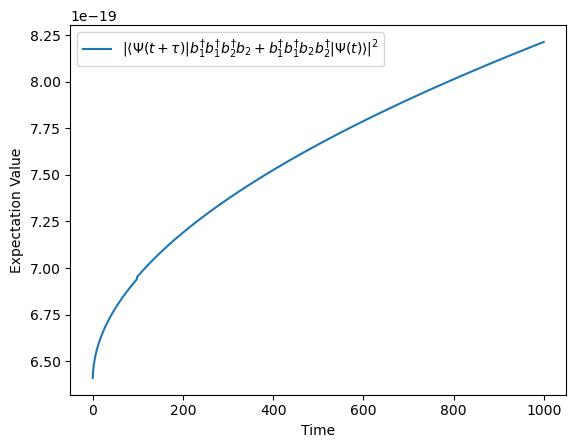

In [8]:
# 绘制结果
# plt.plot(t_list1, expectation_values1, label=r'$\langle Ψ(t+\tau) | b_1^{\dagger}b_1^{\dagger}b_2^{\dagger}b_2 | Ψ(t) \rangle$')
plt.plot(t_list1, possibility1, label=r'$|\langle Ψ(t+\tau) | b_1^{\dagger}b_1^{\dagger}b_2^{\dagger}b_2+b_1^{\dagger}b_1^{\dagger}b_2b_2^{\dagger} | Ψ(t) \rangle|^2$')
plt.xlabel('Time')
plt.ylabel('Expectation Value')
plt.legend()
plt.show()

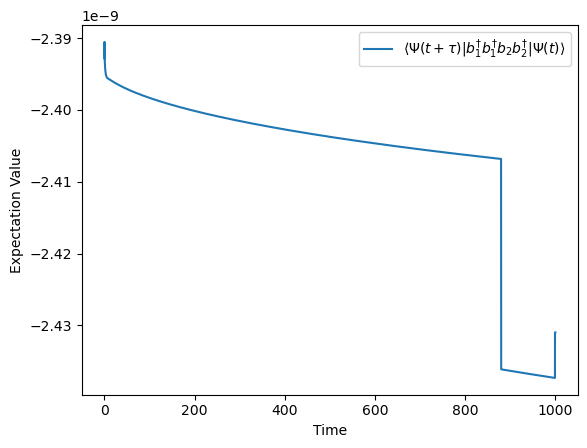

In [9]:
# 定义时间范围和时间间隔
t_list2 = np.linspace(0, 1000, 10**4) # 时间范围
tau2 = 0.0001  # 时间间隔

# 计算随时间演化的期望值
expectation_values2 = []

for t2 in t_list2:
    result = mesolve(H, psi0, [t2, t2 + tau2], [b1.dag() * b1.dag() * b2* b2.dag()])
    Ψ_t_plus_tau2 = result.states[-1]
    expectation_value2 = expect(Q2, Ψ_t_plus_tau2)
    expectation_values2.append(expectation_value2)

# 绘制结果
plt.plot(t_list2, expectation_values2, label=r'$\langle Ψ(t+\tau) | b_1^{\dagger}b_1^{\dagger}b_2b_2^{\dagger} | Ψ(t) \rangle$')
plt.xlabel('Time')
plt.ylabel('Expectation Value')
plt.legend()
plt.show()

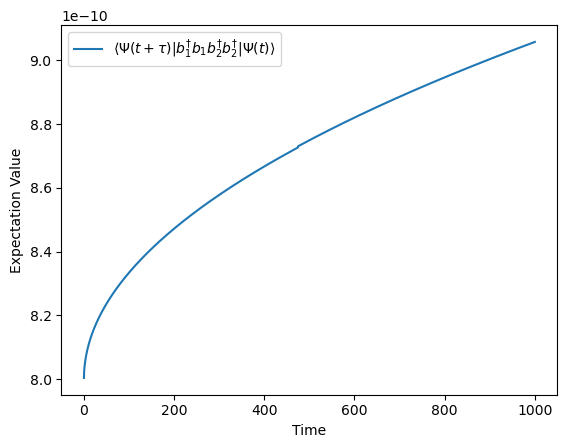

In [10]:
# 定义时间范围和时间间隔
t_list3 = np.linspace(0, 1000, 10**4) # 时间范围
tau3 = 0.0001  # 时间间隔
# 计算随时间演化的期望值
expectation_values3 = []

for t3 in t_list3:
    result = mesolve(H, psi0, [t3, t3 + tau3], [b1.dag() * b1 * b2.dag() * b2.dag()])
    Ψ_t_plus_tau3 = result.states[-1]
    expectation_value3 = expect(Q3, Ψ_t_plus_tau3)
    expectation_values3.append(expectation_value3)

# 绘制结果
plt.plot(t_list3, expectation_values3, label=r'$\langle Ψ(t+\tau) | b_1^{\dagger}b_1b_2^{\dagger}b_2^{\dagger} | Ψ(t) \rangle$')
plt.xlabel('Time')
plt.ylabel('Expectation Value')
plt.legend()
plt.show()

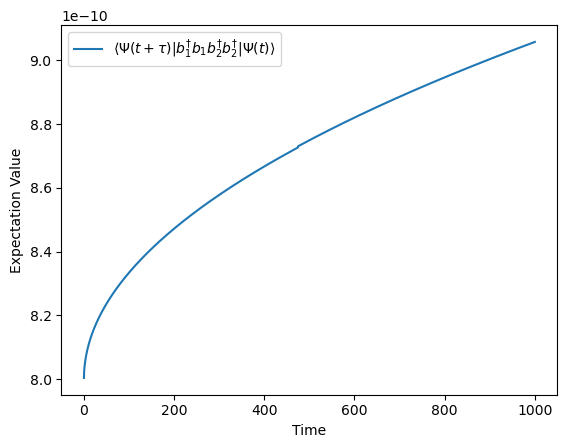

In [11]:
# 定义时间范围和时间间隔
t_list4 = np.linspace(0, 1000, 10**4) # 时间范围
tau4 = 0.0001  # 时间间隔
# 计算随时间演化的期望值
expectation_values4 = []

for t4 in t_list4:
    result = mesolve(H, psi0, [t4, t4 + tau4], [b1 * b1.dag() * b2.dag() * b2.dag()])
    Ψ_t_plus_tau4 = result.states[-1]
    expectation_value4 = expect(Q4, Ψ_t_plus_tau4)
    expectation_values4.append(expectation_value4)

# 绘制结果
plt.plot(t_list4, expectation_values3, label=r'$\langle Ψ(t+\tau) | b_1^{\dagger}b_1b_2^{\dagger}b_2^{\dagger} | Ψ(t) \rangle$')
plt.xlabel('Time')
plt.ylabel('Expectation Value')
plt.legend()
plt.show()